# Demo of VAE for skin cancer detection
Trained for 5 hrs on only images of normal birthmarks and moles to recreate the results of this paper: https://arxiv.org/pdf/1807.01349.pdf

Build the model for 128 x 128 pixel images.

In [1]:
%matplotlib inline

In [2]:
from demo import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
model = VAE2D(128)
model.to(device)
model

VAE2D(
  (encoder): Sequential(
    (input-conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (input-relu): ReLU(inplace)
    (pyramid_64-128_conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (pyramid_128_batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_128_relu): ReLU(inplace)
    (pyramid_128-256_conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (pyramid_256_batchnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_256_relu): ReLU(inplace)
    (pyramid_256-512_conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (pyramid_512_batchnorm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_512_relu): ReLU(inplace)
    (pyramid_512-1024_conv): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (pyramid_1024_batchno

Load the best parameters from training.

In [4]:
model = load_checkpoint(model, device)

Checkpoint Performance:
Validation loss: 148.049
Epoch: 33


Next we need to load the datasets of skin images. Transforming them to 128 x 128 pixels in batches of 32.

In [5]:
train_dl, val_dl, test_dl = load_datasets('data/NV_outlier/', 128)

Let's get some random images from the dataset for examples and generate new versions.

In [6]:
imgs, targets = get_random_images(test_dl)

In [7]:
list_target_classes(test_dl)

0 = MEL
1 = NV


In [8]:
targets

tensor([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [9]:
model.eval()
with torch.no_grad():
    # Generate
    imgs = imgs.to(device)
    gen_imgs, mu, logvar = model(imgs)

Show the images.

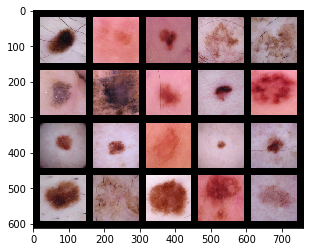

In [10]:
show_images(imgs)

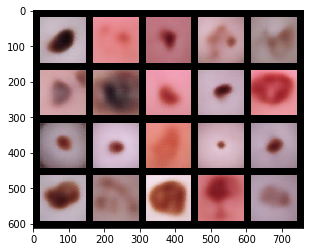

In [11]:
show_images(gen_imgs)

Let's score the success of the recreation and look for outliers.

In [12]:
%run -i outlier_detection.py

209it [00:23,  9.00it/s]
  0%|          | 0/11 [00:00<?, ?it/s]

###################### MEANS #####################
                            MEL           NV
reconst_score        329.667412   133.284856
KL_score              11.169507     8.679358
vae_score            329.779106   133.371649
iwae_reconst_score   658.350503   266.351930
iwae_KL_score       3798.566514  2756.923894
iwae_score           696.799750   294.314043
###################### AUC ROC #####################
                         MEL
reconst_score       0.857601
KL_score            0.637821
vae_score           0.857601
iwae_reconst_score  0.857326
iwae_KL_score       0.631960
iwae_score          0.856136
####################################################


100%|██████████| 11/11 [00:02<00:00,  4.27it/s]

###################### AUC ROC GAMMA #####################
                  MEL
gamma score  0.845604
##########################################################


<Figure size 432x288 with 0 Axes>